# Practice Lab: Decision Trees

In this exercise, you will implement a decision tree from scratch and apply it to the task of classifying whether a mushroom is edible or poisonous.

# Outline
- [ 1 - Packages ](#1)
- [ 2 -  Problem Statement](#2)
- [ 3 - Dataset](#3)
  - [ 3.1 One hot encoded dataset](#3.1)
- [ 4 - Decision Tree Refresher](#4)
  - [ 4.1  Calculate entropy](#4.1)
    - [ Exercise 1](#ex01)
  - [ 4.2  Split dataset](#4.2)
    - [ Exercise 2](#ex02)
  - [ 4.3  Calculate information gain](#4.3)
    - [ Exercise 3](#ex03)
  - [ 4.4  Get best split](#4.4)
    - [ Exercise 4](#ex04)
- [ 5 - Building the tree](#5)


_**NOTE:** To prevent errors from the autograder, you are not allowed to edit or delete non-graded cells in this notebook . Please also refrain from adding any new cells. 
**Once you have passed this assignment** and want to experiment with any of the non-graded code, you may follow the instructions at the bottom of this notebook._

<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://www.numpy.org) is the fundamental package for working with matrices in Python.
- [matplotlib](https://matplotlib.org) is a famous library to plot graphs in Python.
- ``utils.py`` contains helper functions for this assignment. You do not need to modify code in this file.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from public_tests import *
from utils import *

%matplotlib inline

<a name="2"></a>
## 2 -  Problem Statement

Suppose you are starting a company that grows and sells wild mushrooms. 
- Since not all mushrooms are edible, you'd like to be able to tell whether a given mushroom is edible or poisonous based on it's physical attributes
- You have some existing data that you can use for this task. 

Can you use the data to help you identify which mushrooms can be sold safely? 

Note: The dataset used is for illustrative purposes only. It is not meant to be a guide on identifying edible mushrooms.



<a name="3"></a>
## 3 - Dataset

You will start by loading the dataset for this task. The dataset you have collected is as follows:

|                                                     | Cap Color | Stalk Shape | Solitary | Edible |
|:---------------------------------------------------:|:---------:|:-----------:|:--------:|:------:|
| <img src="images/0.png" alt="drawing" width="50"/> |   Brown   |   Tapering  |    Yes   |    1   |
| <img src="images/1.png" alt="drawing" width="50"/> |   Brown   |  Enlarging  |    Yes   |    1   |
| <img src="images/2.png" alt="drawing" width="50"/> |   Brown   |  Enlarging  |    No    |    0   |
| <img src="images/3.png" alt="drawing" width="50"/> |   Brown   |  Enlarging  |    No    |    0   |
| <img src="images/4.png" alt="drawing" width="50"/> |   Brown   |   Tapering  |    Yes   |    1   |
| <img src="images/5.png" alt="drawing" width="50"/> |    Red    |   Tapering  |    Yes   |    0   |
| <img src="images/6.png" alt="drawing" width="50"/> |    Red    |  Enlarging  |    No    |    0   |
| <img src="images/7.png" alt="drawing" width="50"/> |   Brown   |  Enlarging  |    Yes   |    1   |
| <img src="images/8.png" alt="drawing" width="50"/> |    Red    |   Tapering  |    No    |    1   |
| <img src="images/9.png" alt="drawing" width="50"/> |   Brown   |  Enlarging  |    No    |    0   |


-  You have 10 examples of mushrooms. For each example, you have
    - Three features
        - Cap Color (`Brown` or `Red`),
        - Stalk Shape (`Tapering (as in \/)` or `Enlarging (as in /\)`), and
        - Solitary (`Yes` or `No`)
    - Label
        - Edible (`1` indicating yes or `0` indicating poisonous)

<a name="3.1"></a>
### 3.1 One hot encoded dataset
For ease of implementation, we have one-hot encoded the features (turned them into 0 or 1 valued features)

|                                                    | Brown Cap | Tapering Stalk Shape | Solitary | Edible |
|:--------------------------------------------------:|:---------:|:--------------------:|:--------:|:------:|
| <img src="images/0.png" alt="drawing" width="50"/> |     1     |           1          |     1    |    1   |
| <img src="images/1.png" alt="drawing" width="50"/> |     1     |           0          |     1    |    1   |
| <img src="images/2.png" alt="drawing" width="50"/> |     1     |           0          |     0    |    0   |
| <img src="images/3.png" alt="drawing" width="50"/> |     1     |           0          |     0    |    0   |
| <img src="images/4.png" alt="drawing" width="50"/> |     1     |           1          |     1    |    1   |
| <img src="images/5.png" alt="drawing" width="50"/> |     0     |           1          |     1    |    0   |
| <img src="images/6.png" alt="drawing" width="50"/> |     0     |           0          |     0    |    0   |
| <img src="images/7.png" alt="drawing" width="50"/> |     1     |           0          |     1    |    1   |
| <img src="images/8.png" alt="drawing" width="50"/> |     0     |           1          |     0    |    1   |
| <img src="images/9.png" alt="drawing" width="50"/> |     1     |           0          |     0    |    0   |


Therefore,
- `X_train` contains three features for each example 
    - Brown Color (A value of `1` indicates "Brown" cap color and `0` indicates "Red" cap color)
    - Tapering Shape (A value of `1` indicates "Tapering Stalk Shape" and `0` indicates "Enlarging" stalk shape)
    - Solitary  (A value of `1` indicates "Yes" and `0` indicates "No")

- `y_train` is whether the mushroom is edible 
    - `y = 1` indicates edible
    - `y = 0` indicates poisonous

In [2]:
X_train = np.array([[1,1,1],[1,0,1],[1,0,0],[1,0,0],[1,1,1],[0,1,1],[0,0,0],[1,0,1],[0,1,0],[1,0,0]])
y_train = np.array([1,1,0,0,1,0,0,1,1,0])

#### View the variables
Let's get more familiar with your dataset.  
- A good place to start is to just print out each variable and see what it contains.

The code below prints the first few elements of `X_train` and the type of the variable.

In [3]:
print("First few elements of X_train:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First few elements of X_train:
 [[1 1 1]
 [1 0 1]
 [1 0 0]
 [1 0 0]
 [1 1 1]]
Type of X_train: <class 'numpy.ndarray'>


Now, let's do the same for `y_train`

In [4]:
print("First few elements of y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

First few elements of y_train: [1 1 0 0 1]
Type of y_train: <class 'numpy.ndarray'>


#### Check the dimensions of your variables

Another useful way to get familiar with your data is to view its dimensions.

Please print the shape of `X_train` and `y_train` and see how many training examples you have in your dataset.

In [5]:
print ('The shape of X_train is:', X_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(X_train))

The shape of X_train is: (10, 3)
The shape of y_train is:  (10,)
Number of training examples (m): 10


<a name="4"></a>
## 4 - Decision Tree Refresher

In this practice lab, you will build a decision tree based on the dataset provided.

- Recall that the steps for building a decision tree are as follows:
    - Start with all examples at the root node
    - Calculate information gain for splitting on all possible features, and pick the one with the highest information gain
    - Split dataset according to the selected feature, and create left and right branches of the tree
    - Keep repeating splitting process until stopping criteria is met
  
  
- In this lab, you'll implement the following functions, which will let you split a node into left and right branches using the feature with the highest information gain
    - Calculate the entropy at a node 
    - Split the dataset at a node into left and right branches based on a given feature
    - Calculate the information gain from splitting on a given feature
    - Choose the feature that maximizes information gain
    
- We'll then use the helper functions you've implemented to build a decision tree by repeating the splitting process until the stopping criteria is met 
    - For this lab, the stopping criteria we've chosen is setting a maximum depth of 2

<a name="4.1"></a>
### 4.1  Calculate entropy

First, you'll write a helper function called `compute_entropy` that computes the entropy (measure of impurity) at a node. 
- The function takes in a numpy array (`y`) that indicates whether the examples in that node are edible (`1`) or poisonous(`0`) 

Complete the `compute_entropy()` function below to:
* Compute $p_1$, which is the fraction of examples that are edible (i.e. have value = `1` in `y`)
* The entropy is then calculated as 

$$H(p_1) = -p_1 \text{log}_2(p_1) - (1- p_1) \text{log}_2(1- p_1)$$
* Note 
    * The log is calculated with base $2$
    * For implementation purposes, $0\text{log}_2(0) = 0$. That is, if `p_1 = 0` or `p_1 = 1`, set the entropy to `0`
    * Make sure to check that the data at a node is not empty (i.e. `len(y) != 0`). Return `0` if it is
    
<a name="ex01"></a>
### Exercise 1

Please complete the `compute_entropy()` function using the previous instructions.
    
If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [6]:
# UNQ_C1
# GRADED FUNCTION: compute_entropy

def compute_entropy(y):
    """
    Computes the entropy for 
    
    Args:
       y (ndarray): Numpy array indicating whether each example at a node is
           edible (`1`) or poisonous (`0`)
       
    Returns:
        entropy (float): Entropy at that node
        
    """
    # You need to return the following variables correctly
    entropy = 0.
    
    ### START CODE HERE ###
    if len(y) != 0:
        p1 = len(y[y == 1]) / len(y)
        
        if p1 != 0 and p1 != 1:
   
            entropy = -p1 * np.log2(p1) - (1-p1) * np.log2(1-p1)
    
        else:
            entropy = 0.
         
    ### END CODE HERE ###        
    
    return entropy

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
    
   * To calculate `p1`
       * You can get the subset of examples in `y` that have the value `1` as `y[y == 1]`
       * You can use `len(y)` to get the number of examples in `y`
   * To calculate `entropy`
       * <a href="https://numpy.org/doc/stable/reference/generated/numpy.log2.html">np.log2</a> let's you calculate the logarithm to base 2 for a numpy array
       * If the value of `p1` is 0 or 1, make sure to set the entropy to `0` 
     
    <details>
          <summary><font size="2" color="darkblue"><b> Click for more hints</b></font></summary>
        
    * Here's how you can structure the overall implementation for this function
    ```python 
    def compute_entropy(y):
        
        # You need to return the following variables correctly
        entropy = 0.

        ### START CODE HERE ###
        if len(y) != 0:
            # Your code here to calculate the fraction of edible examples (i.e with value = 1 in y)
            p1 =

            # For p1 = 0 and 1, set the entropy to 0 (to handle 0log0)
            if p1 != 0 and p1 != 1:
                # Your code here to calculate the entropy using the formula provided above
                entropy = 
            else:
                entropy = 0. 
        ### END CODE HERE ###        

        return entropy
    ```
    
    If you're still stuck, you can check the hints presented below to figure out how to calculate `p1` and `entropy`.
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate p1</b></font></summary>
           &emsp; &emsp; You can compute p1 as <code>p1 = len(y[y == 1]) / len(y) </code>
    </details>

     <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate entropy</b></font></summary>
          &emsp; &emsp; You can compute entropy as <code>entropy = -p1 * np.log2(p1) - (1 - p1) * np.log2(1 - p1)</code>
    </details>
        
    </details>

</details>

    


You can check if your implementation was correct by running the following test code:

In [7]:
# Compute entropy at the root node (i.e. with all examples)
# Since we have 5 edible and 5 non-edible mushrooms, the entropy should be 1"

print("Entropy at root node: ", compute_entropy(y_train)) 

# UNIT TESTS
compute_entropy_test(compute_entropy)

Entropy at root node:  1.0
 All tests passed.


**Expected Output**:
<table>
  <tr>
    <td> <b>Entropy at root node:<b> 1.0 </td> 
  </tr>
</table>

<a name="4.2"></a>
### 4.2  Split dataset

Next, you'll write a helper function called `split_dataset` that takes in the data at a node and a feature to split on and splits it into left and right branches. Later in the lab, you'll implement code to calculate how good the split is.

- The function takes in the training data, the list of indices of data points at that node, along with the feature to split on. 
- It splits the data and returns the subset of indices at the left and the right branch.
- For example, say we're starting at the root node (so `node_indices = [0,1,2,3,4,5,6,7,8,9]`), and we chose to split on feature `0`, which is whether or not the example has a brown cap. 
    - The output of the function is then, `left_indices = [0,1,2,3,4,7,9]` (data points with brown cap) and `right_indices = [5,6,8]` (data points without a brown cap)
    
    
|       |                                                    | Brown Cap | Tapering Stalk Shape | Solitary | Edible |
|-------|:--------------------------------------------------:|:---------:|:--------------------:|:--------:|:------:|
| 0     | <img src="images/0.png" alt="drawing" width="50"/> |     1     |           1          |     1    |    1   |
| 1     | <img src="images/1.png" alt="drawing" width="50"/> |     1     |           0          |     1    |    1   |
| 2     | <img src="images/2.png" alt="drawing" width="50"/> |     1     |           0          |     0    |    0   |
| 3     | <img src="images/3.png" alt="drawing" width="50"/> |     1     |           0          |     0    |    0   |
| 4     | <img src="images/4.png" alt="drawing" width="50"/> |     1     |           1          |     1    |    1   |
| 5     | <img src="images/5.png" alt="drawing" width="50"/> |     0     |           1          |     1    |    0   |
| 6     | <img src="images/6.png" alt="drawing" width="50"/> |     0     |           0          |     0    |    0   |
| 7     | <img src="images/7.png" alt="drawing" width="50"/> |     1     |           0          |     1    |    1   |
| 8     | <img src="images/8.png" alt="drawing" width="50"/> |     0     |           1          |     0    |    1   |
| 9     | <img src="images/9.png" alt="drawing" width="50"/> |     1     |           0          |     0    |    0   |
    
<a name="ex02"></a>
### Exercise 2

Please complete the `split_dataset()` function shown below

- For each index in `node_indices`
    - If the value of `X` at that index for that feature is `1`, add the index to `left_indices`
    - If the value of `X` at that index for that feature is `0`, add the index to `right_indices`

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [8]:
# UNQ_C2
# GRADED FUNCTION: split_dataset

def split_dataset(X, node_indices, feature):
    """
    Splits the data at the given node into
    left and right branches
    
    Args:
        X (ndarray):             Data matrix of shape(n_samples, n_features)
        node_indices (list):     List containing the active indices. I.e, the samples being considered at this step.
        feature (int):           Index of feature to split on
    
    Returns:
        left_indices (list):     Indices with feature value == 1
        right_indices (list):    Indices with feature value == 0
    """
    
    # You need to return the following variables correctly
    left_indices = []
    right_indices = []
    
    ### START CODE HERE ###
    for i in node_indices:
        if X[i][feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)    
            
    ### END CODE HERE ###
        
    return left_indices, right_indices

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
    
   * Here's how you can structure the overall implementation for this function
    ```python 
    def split_dataset(X, node_indices, feature):
    
        # You need to return the following variables correctly
        left_indices = []
        right_indices = []

        ### START CODE HERE ###
        # Go through the indices of examples at that node
        for i in node_indices:   
            if # Your code here to check if the value of X at that index for the feature is 1
                left_indices.append(i)
            else:
                right_indices.append(i)
        ### END CODE HERE ###
        
    return left_indices, right_indices
    ```
    <details>
          <summary><font size="2" color="darkblue"><b> Click for more hints</b></font></summary>
        
    The condition is <code> if X[i][feature] == 1:</code>.
        
    </details>

</details>

    


Now, let's check your implementation using the code blocks below. Let's try splitting the dataset at the root node, which contains all examples at feature 0 (Brown Cap) as we'd discussed above. We've also provided a helper function to visualize the output of the split.

Left indices:  [0, 1, 2, 3, 4, 7, 9]
Right indices:  [5, 6, 8]


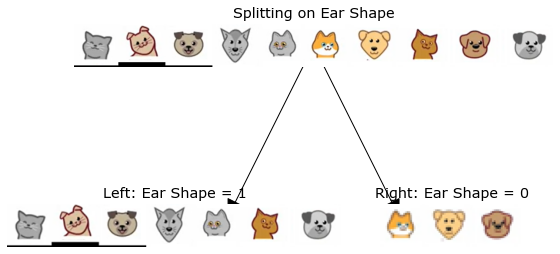

 All tests passed.


In [9]:
root_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Feel free to play around with these variables
# The dataset only has three features, so this value can be 0 (Brown Cap), 1 (Tapering Stalk Shape) or 2 (Solitary)
feature = 0

left_indices, right_indices = split_dataset(X_train, root_indices, feature)

print("Left indices: ", left_indices)
print("Right indices: ", right_indices)

# Visualize the split 
generate_split_viz(root_indices, left_indices, right_indices, feature)

# UNIT TESTS    
split_dataset_test(split_dataset)

**Expected Output**:
```
Left indices:  [0, 1, 2, 3, 4, 7, 9]
Right indices:  [5, 6, 8]
```

<a name="4.3"></a>
### 4.3  Calculate information gain

Next, you'll write a function called `information_gain` that takes in the training data, the indices at a node and a feature to split on and returns the information gain from the split.

<a name="ex03"></a>
### Exercise 3

Please complete the `compute_information_gain()` function shown below to compute

$$\text{Information Gain} = H(p_1^\text{node})- (w^{\text{left}}H(p_1^\text{left}) + w^{\text{right}}H(p_1^\text{right}))$$

where 
- $H(p_1^\text{node})$ is entropy at the node 
- $H(p_1^\text{left})$ and $H(p_1^\text{right})$ are the entropies at the left and the right branches resulting from the split
- $w^{\text{left}}$ and $w^{\text{right}}$ are the proportion of examples at the left and right branch, respectively

Note:
- You can use the `compute_entropy()` function that you implemented above to calculate the entropy
- We've provided some starter code that uses the `split_dataset()` function you implemented above to split the dataset 

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [10]:
# UNQ_C3
# GRADED FUNCTION: compute_information_gain

def compute_information_gain(X, y, node_indices, feature):
    
    """
    Compute the information of splitting the node on a given feature
    
    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.
   
    Returns:
        cost (float):        Cost computed
    
    """    
    # Split dataset
    left_indices, right_indices = split_dataset(X, node_indices, feature)
    
    # Some useful variables
    X_node, y_node = X[node_indices], y[node_indices]
    X_left, y_left = X[left_indices], y[left_indices]
    X_right, y_right = X[right_indices], y[right_indices]
    
    # You need to return the following variables correctly
    information_gain = 0
    
    ### START CODE HERE ###
    # Your code here to compute the entropy at the node using compute_entropy()
    node_entropy = compute_entropy(y_node)
    # Your code here to compute the entropy at the left branch
    left_entropy = compute_entropy(y_left)
    # Your code here to compute the entropy at the right branch
    right_entropy = compute_entropy(y_right)

    # Your code here to compute the proportion of examples at the left branch
    w_left = len(X_left) / len(X_node)

    # Your code here to compute the proportion of examples at the right branch
    w_right = len(X_right) / len(X_node)

    # Your code here to compute weighted entropy from the split using 
    # w_left, w_right, left_entropy and right_entropy
    weighted_entropy = w_left * left_entropy + w_right * right_entropy
    
    # Your code here to compute the information gain as the entropy at the node
    # minus the weighted entropy
    information_gain = node_entropy - weighted_entropy
    
    
    ### END CODE HERE ###  
    
    return information_gain

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
    
   * Here's how you can structure the overall implementation for this function
    ```python 
    def compute_information_gain(X, y, node_indices, feature):
        # Split dataset
        left_indices, right_indices = split_dataset(X, node_indices, feature)

        # Some useful variables
        X_node, y_node = X[node_indices], y[node_indices]
        X_left, y_left = X[left_indices], y[left_indices]
        X_right, y_right = X[right_indices], y[right_indices]

        # You need to return the following variables correctly
        information_gain = 0

        ### START CODE HERE ###
        # Your code here to compute the entropy at the node using compute_entropy()
        node_entropy = 
        # Your code here to compute the entropy at the left branch
        left_entropy = 
        # Your code here to compute the entropy at the right branch
        right_entropy = 

        # Your code here to compute the proportion of examples at the left branch
        w_left = 
        
        # Your code here to compute the proportion of examples at the right branch
        w_right = 

        # Your code here to compute weighted entropy from the split using 
        # w_left, w_right, left_entropy and right_entropy
        weighted_entropy = 

        # Your code here to compute the information gain as the entropy at the node
        # minus the weighted entropy
        information_gain = 
        ### END CODE HERE ###  

        return information_gain
    ```
    If you're still stuck, check out the hints below.
    
    <details>
          <summary><font size="2" color="darkblue"><b> Hint to calculate the entropies</b></font></summary>
        
    <code>node_entropy = compute_entropy(y_node)</code><br>
    <code>left_entropy = compute_entropy(y_left)</code><br>
    <code>right_entropy = compute_entropy(y_right)</code>
        
    </details>
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate w_left and w_right</b></font></summary>
           <code>w_left = len(X_left) / len(X_node)</code><br>
           <code>w_right = len(X_right) / len(X_node)</code>
    </details>
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate weighted_entropy</b></font></summary>
           <code>weighted_entropy = w_left * left_entropy + w_right * right_entropy</code>
    </details>
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate information_gain</b></font></summary>
           <code> information_gain = node_entropy - weighted_entropy</code>
    </details>


</details>


You can now check your implementation using the cell below and calculate what the information gain would be from splitting on each of the featues

In [11]:
info_gain0 = compute_information_gain(X_train, y_train, root_indices, feature=0)
print("Information Gain from splitting the root on brown cap: ", info_gain0)

info_gain1 = compute_information_gain(X_train, y_train, root_indices, feature=1)
print("Information Gain from splitting the root on tapering stalk shape: ", info_gain1)

info_gain2 = compute_information_gain(X_train, y_train, root_indices, feature=2)
print("Information Gain from splitting the root on solitary: ", info_gain2)

# UNIT TESTS
compute_information_gain_test(compute_information_gain)

Information Gain from splitting the root on brown cap:  0.034851554559677034
Information Gain from splitting the root on tapering stalk shape:  0.12451124978365313
Information Gain from splitting the root on solitary:  0.2780719051126377
 All tests passed.


**Expected Output**:
```
Information Gain from splitting the root on brown cap:  0.034851554559677034
Information Gain from splitting the root on tapering stalk shape:  0.12451124978365313
Information Gain from splitting the root on solitary:  0.2780719051126377
```

Splitting on "Solitary" (feature = 2) at the root node gives the maximum information gain. Therefore, it's the best feature to split on at the root node.

<a name="4.4"></a>
### 4.4  Get best split
Now let's write a function to get the best feature to split on by computing the information gain from each feature as we did above and returning the feature that gives the maximum information gain

<a name="ex04"></a>
### Exercise 4
Please complete the `get_best_split()` function shown below.
- The function takes in the training data, along with the indices of datapoint at that node
- The output of the function is the feature that gives the maximum information gain 
    - You can use the `compute_information_gain()` function to iterate through the features and calculate the information for each feature
If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [12]:
# UNQ_C4
# GRADED FUNCTION: get_best_split

def get_best_split(X, y, node_indices):   
    """
    Returns the optimal feature and threshold value
    to split the node data 
    
    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.

    Returns:
        best_feature (int):     The index of the best feature to split
    """    
    
    # Some useful variables
    num_features = X.shape[1]
    
    # You need to return the following variables correctly
    best_feature = -1
    
    ### START CODE HERE ###
    max_info_gain = 0
    for feature in range(num_features): 
        # Your code here to compute the information gain from splitting on this feature
        info_gain = compute_information_gain(X, y, node_indices, feature)

       # If the information gain is larger than the max seen so far
        if info_gain > max_info_gain:  
            # Your code here to set the max_info_gain and best_feature
            max_info_gain = info_gain
            best_feature = feature

    ### END CODE HERE ##    
   
    return best_feature

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
    
   * Here's how you can structure the overall implementation for this function
    
    ```python 
    def get_best_split(X, y, node_indices):   

        # Some useful variables
        num_features = X.shape[1]

        # You need to return the following variables correctly
        best_feature = -1

        ### START CODE HERE ###
        max_info_gain = 0

        # Iterate through all features
        for feature in range(num_features): 
            
            # Your code here to compute the information gain from splitting on this feature
            info_gain = 
            
            # If the information gain is larger than the max seen so far
            if info_gain > max_info_gain:  
                # Your code here to set the max_info_gain and best_feature
                max_info_gain = 
                best_feature = 
        ### END CODE HERE ##    
   
    return best_feature
    ```
    If you're still stuck, check out the hints below.
    
    <details>
          <summary><font size="2" color="darkblue"><b> Hint to calculate info_gain</b></font></summary>
        
    <code>info_gain = compute_information_gain(X, y, node_indices, feature)</code>
    </details>
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to update the max_info_gain and best_feature</b></font></summary>
           <code>max_info_gain = info_gain</code><br>
           <code>best_feature = feature</code>
    </details>
</details>


Now, let's check the implementation of your function using the cell below.

In [13]:
best_feature = get_best_split(X_train, y_train, root_indices)
print("Best feature to split on: %d" % best_feature)

# UNIT TESTS
get_best_split_test(get_best_split)

Best feature to split on: 2
 All tests passed.


As we saw above, the function returns that the best feature to split on at the root node is feature 2 ("Solitary")

<a name="5"></a>
## 5 - Building the tree

In this section, we use the functions you implemented above to generate a decision tree by successively picking the best feature to split on until we reach the stopping criteria (maximum depth is 2).

You do not need to implement anything for this part.

In [14]:
# Not graded
tree = []

def build_tree_recursive(X, y, node_indices, branch_name, max_depth, current_depth):
    """
    Build a tree using the recursive algorithm that split the dataset into 2 subgroups at each node.
    This function just prints the tree.
    
    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.
        branch_name (string):   Name of the branch. ['Root', 'Left', 'Right']
        max_depth (int):        Max depth of the resulting tree. 
        current_depth (int):    Current depth. Parameter used during recursive call.
   
    """ 

    # Maximum depth reached - stop splitting
    if current_depth == max_depth:
        formatting = " "*current_depth + "-"*current_depth
        print(formatting, "%s leaf node with indices" % branch_name, node_indices)
        return
   
    # Otherwise, get best split and split the data
    # Get the best feature and threshold at this node
    best_feature = get_best_split(X, y, node_indices) 
    
    formatting = "-"*current_depth
    print("%s Depth %d, %s: Split on feature: %d" % (formatting, current_depth, branch_name, best_feature))
    
    # Split the dataset at the best feature
    left_indices, right_indices = split_dataset(X, node_indices, best_feature)
    tree.append((left_indices, right_indices, best_feature))
    
    # continue splitting the left and the right child. Increment current depth
    build_tree_recursive(X, y, left_indices, "Left", max_depth, current_depth+1)
    build_tree_recursive(X, y, right_indices, "Right", max_depth, current_depth+1)

 Depth 0, Root: Split on feature: 2
- Depth 1, Left: Split on feature: 0
  -- Left leaf node with indices [0, 1, 4, 7]
  -- Right leaf node with indices [5]
- Depth 1, Right: Split on feature: 1
  -- Left leaf node with indices [8]
  -- Right leaf node with indices [2, 3, 6, 9]


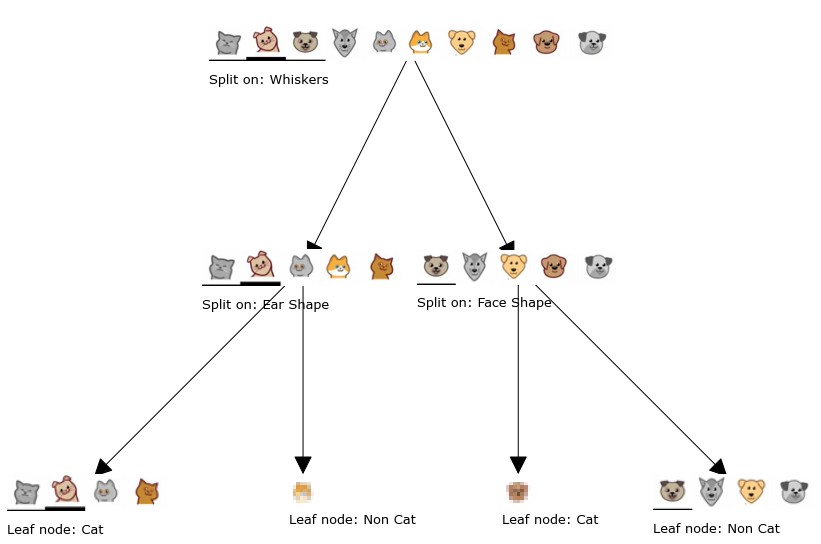

In [15]:
build_tree_recursive(X_train, y_train, root_indices, "Root", max_depth=2, current_depth=0)
generate_tree_viz(root_indices, y_train, tree)

<details>
  <summary><font size="2" color="darkgreen"><b>Please click here if you want to experiment with any of the non-graded code.</b></font></summary>
    <p><i><b>Important Note: Please only do this when you've already passed the assignment to avoid problems with the autograder.</b></i>
    <ol>
        <li> On the notebook’s menu, click “View” > “Cell Toolbar” > “Edit Metadata”</li>
        <li> Hit the “Edit Metadata” button next to the code cell which you want to lock/unlock</li>
        <li> Set the attribute value for “editable” to:
            <ul>
                <li> “true” if you want to unlock it </li>
                <li> “false” if you want to lock it </li>
            </ul>
        </li>
        <li> On the notebook’s menu, click “View” > “Cell Toolbar” > “None” </li>
    </ol>
    <p> Here's a short demo of how to do the steps above: 
        <br>
        <img src="https://drive.google.com/uc?export=view&id=14Xy_Mb17CZVgzVAgq7NCjMVBvSae3xO1" align="center" alt="unlock_cells.gif">
</details>